In [44]:
import streamlit as st
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [45]:
data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv',index_col='Person ID')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 1 to 374
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 38.0+ KB


In [4]:
data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
data["BMI Category"].replace(['Normal Weight'], ['Normal'],inplace=True)

In [34]:
data["BMI Category"].value_counts()

Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: BMI Category, dtype: int64

In [35]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

Gender - 0.0%
Age - 0.0%
Occupation - 0.0%
Sleep Duration - 0.0%
Quality of Sleep - 0.0%
Physical Activity Level - 0.0%
Stress Level - 0.0%
BMI Category - 0.0%
Blood Pressure - 0.0%
Heart Rate - 0.0%
Daily Steps - 0.0%
Sleep Disorder - 0.0%


In [36]:
data.dtypes

Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [37]:
data_sorted1 = data['Physical Activity Level'].sort_values(ascending=True)
data_sorted2 = data['Sleep Duration'].sort_values(ascending=True)

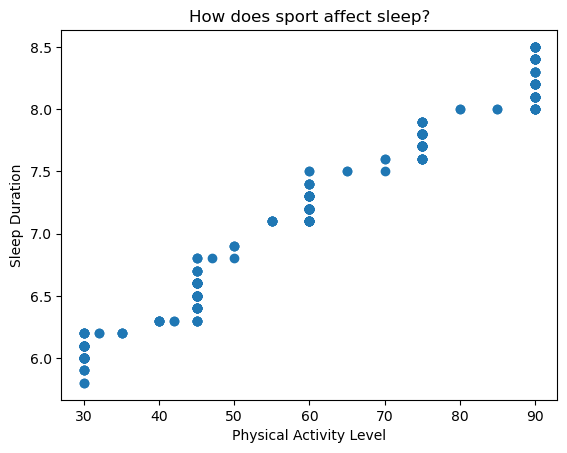

In [38]:
plt.scatter(x=data_sorted1, y=data_sorted2)
plt.title('How does sport affect sleep?')
plt.xlabel('Physical Activity Level')
plt.ylabel('Sleep Duration')
plt.show()

In [39]:
data.corr(method = 'pearson')

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Age,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973
Sleep Duration,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533
Quality of Sleep,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791
Physical Activity Level,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723
Stress Level,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829
Heart Rate,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309
Daily Steps,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000


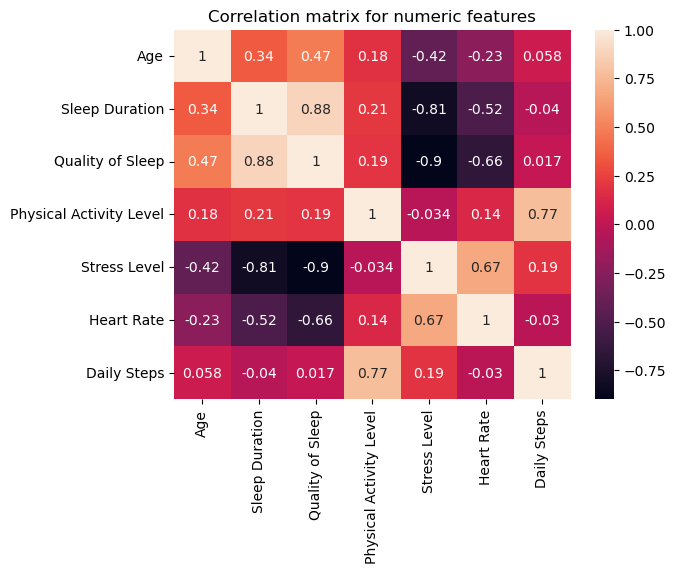

In [40]:
correlarion_matrix = data.corr(method = 'pearson')
sns.heatmap(correlarion_matrix, annot=True)
plt.title('Correlation matrix for numeric features')
plt.show()

In [47]:
data_numerized = data
for col_name in data_numerized.columns:
    if(data_numerized[col_name].dtype == 'object'):
        data_numerized[col_name] = data_numerized[col_name].astype('category')
        data_numerized[col_name] = data_numerized[col_name].cat.codes
        
data_numerized.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,1,27,9,6.1,6,42,6,3,11,77,4200,1
2,1,28,1,6.2,6,60,8,0,9,75,10000,1
3,1,28,1,6.2,6,60,8,0,9,75,10000,1
4,1,28,6,5.9,4,30,8,2,22,85,3000,2
5,1,28,6,5.9,4,30,8,2,22,85,3000,2


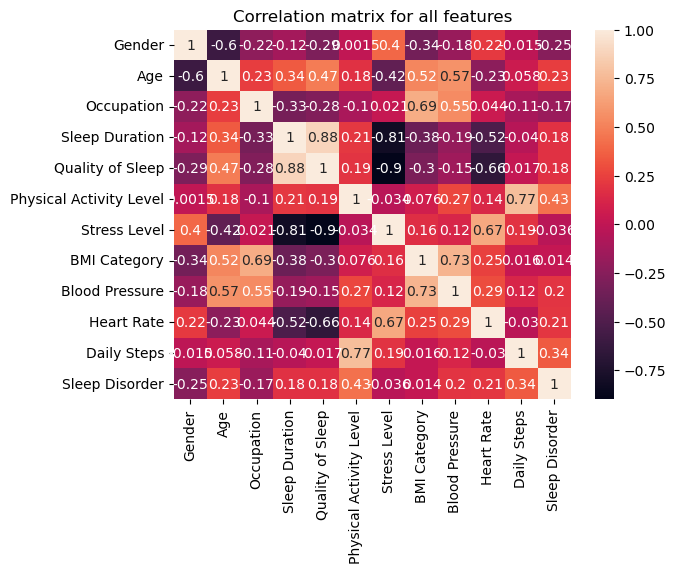

In [14]:
correlarion_matrix_2 = data_numerized.corr(method = 'pearson')
sns.heatmap(correlarion_matrix_2, annot=True)
plt.title('Correlation matrix for all features')
plt.show()

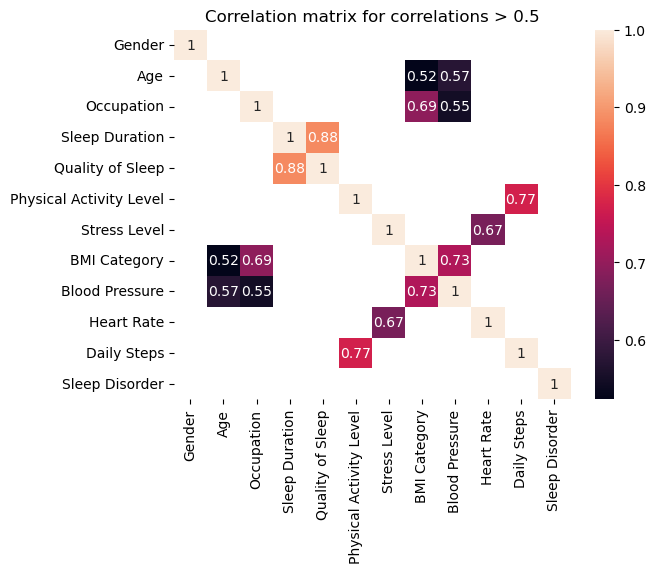

In [15]:
correlation_matr = data_numerized.corr(method='pearson')
high_correlation = correlation_matr[correlation_matr > 0.5]  # Filter correlations greater than 0.5
sns.heatmap(high_correlation, annot=True)
plt.title('Correlation matrix for correlations > 0.5')
plt.show()

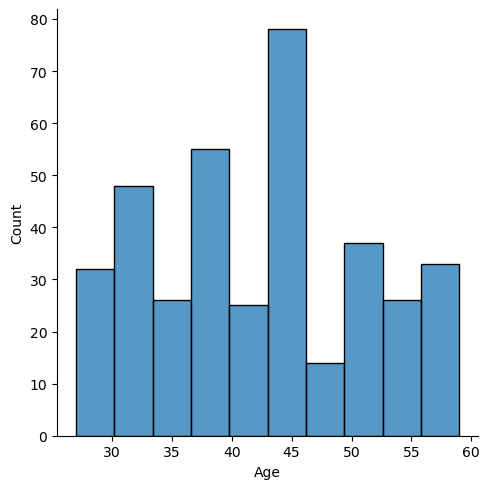

In [16]:
sns.displot(data["Age"])

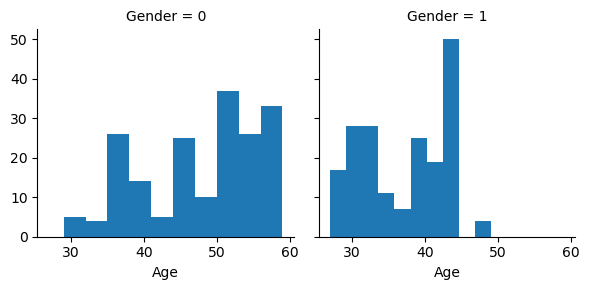

In [17]:
kek = sns.FacetGrid(data=data, col="Gender")
kek.map(plt.hist, "Age")

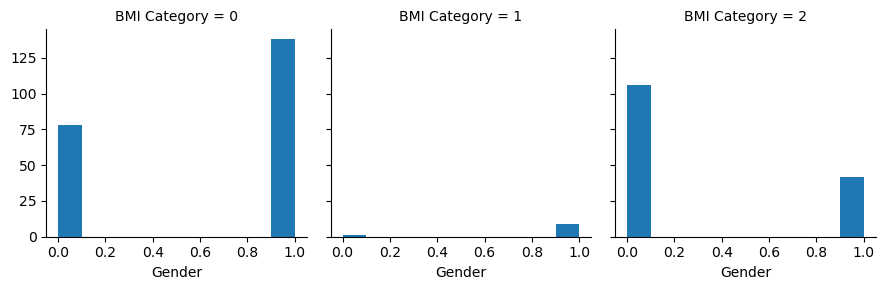

In [18]:
kek2 = sns.FacetGrid(data=data_numerized, col="BMI Category")
kek2.map(plt.hist, "Gender")

<AxesSubplot:xlabel='Gender', ylabel='Physical Activity Level'>

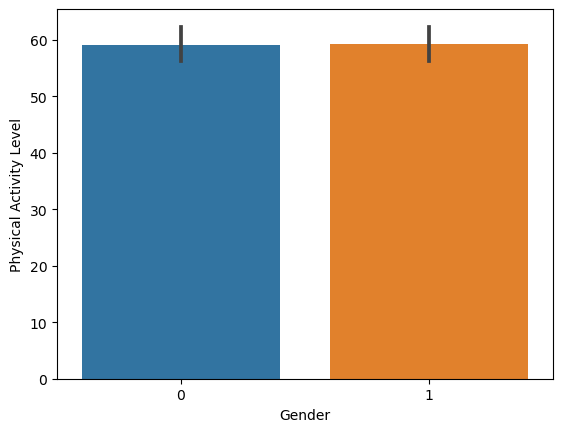

In [19]:
sns.barplot(x = data["Gender"], y= data["Physical Activity Level"])

In [33]:
sorted_prof = data["Occupation"].value_counts().sort_values(ascending=False)
sorted_prof[sorted_prof>30]

Nurse          73
Doctor         71
Engineer       63
Lawyer         47
Teacher        40
Accountant     37
Salesperson    32
Name: Occupation, dtype: int64

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 1 to 374
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    int8   
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    int8   
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    int8   
 8   Blood Pressure           374 non-null    int8   
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    int8   
dtypes: float64(1), int64(6), int8(5)
memory usage: 25.2 KB


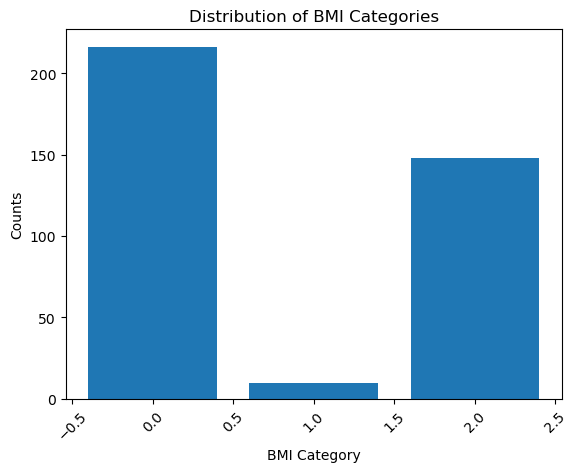

In [22]:
bmi_counts = data["BMI Category"].value_counts()

plt.bar(bmi_counts.index, bmi_counts.values)
plt.xlabel("BMI Category")
plt.ylabel("Counts")
plt.title("Distribution of BMI Categories")

plt.xticks(rotation=45)

plt.show()

In [32]:
sorted_prof = data["Occupation"].value_counts().sort_values(ascending=False)
sorted_data = sorted_prof[sorted_prof>30]
sorted_data

Nurse          73
Doctor         71
Engineer       63
Lawyer         47
Teacher        40
Accountant     37
Salesperson    32
Name: Occupation, dtype: int64

In [29]:
data1 = data[data['Sleep Disorder'] != "None"]
sorted_prof = data1["Occupation"].value_counts()
sorted_prof


Nurse                   64
Teacher                 31
Salesperson             30
Doctor                   7
Accountant               7
Engineer                 6
Lawyer                   5
Sales Representative     2
Scientist                2
Software Engineer        1
Name: Occupation, dtype: int64

In [30]:
data1 = data[data['Sleep Disorder'] != "None"]
sorted_prof = data1["Occupation"].value_counts()

In [48]:
bmi_counts = data["BMI Category"].value_counts()
bmi_counts

0    195
3    148
1     21
2     10
Name: BMI Category, dtype: int64